# Wholesale Customers Project

Objectives: clean the dataset and create a visualisation of the sales by regions and by products.

The goal is to be able to see which region brings the most sales but also how are those sales divided between the different products.

## Import the libraries and the dataset

In [1]:
# The inline flag will use the appropriate backend to make figures appear inline in the notebook.  
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the dataset
wc = pd.read_csv('wholesale-customers.csv')

## Clean the dataset

In [3]:
# check the first line
wc.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# check the 5 last line
wc.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [5]:
# Check if the dataset is complete
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
# make the headers lowcase using the string function .lower()
wc.columns = wc.columns.str.lower()
wc.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
# replace region's data value for understanding purposes
replace_reg = {1: 'region 1', 2: 'region 2', 3: 'region 3'}

In [8]:
wc['region'] = wc['region'].map(replace_reg)
wc.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,2,region 3,12669,9656,7561,214,2674,1338
1,2,region 3,7057,9810,9568,1762,3293,1776
2,2,region 3,6353,8808,7684,2405,3516,7844
3,1,region 3,13265,1196,4221,6404,507,1788
4,2,region 3,22615,5410,7198,3915,1777,5185


## Create two datasets grouped by region and by products

We want to create 2 dataset to be able to display 2 visualisation.
One will analyse the each products sales by regions.
The second will look at all the sales - independently of the product - by regions.

In [9]:
# First let's get the sum of the sales per product by region. We'll use the inplace attribute to save the aggregation.
wcaggrdata = wc.groupby(['region']).sum()
wcaggrdata.drop(columns = ['channel'], inplace = True)
wcaggrdata

,fresh,milk,grocery,frozen,detergents_paper,delicassen
region,,,,,,
region 1,854833,422454,570037,231026,204136,104327
region 2,464721,239144,433274,190132,173311,54506
region 3,3960577,1888759,2495251,930492,890410,512110


In [10]:
# The region column became the index column during the last operation. It is necessary to add it back 
# to be able to use the region column in the next steps.
wcaggrdata = wcaggrdata.reset_index()
wcaggrdata

,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,region 1,854833,422454,570037,231026,204136,104327
1,region 2,464721,239144,433274,190132,173311,54506
2,region 3,3960577,1888759,2495251,930492,890410,512110


In [11]:
# we can now unpivot the columns containing the products and the product's sales
w_unpivot = pd.melt(frame = 
    wcaggrdata, id_vars = 'region',
value_vars = ['fresh', 'milk', 'grocery', 'frozen', 'detergents_paper',
             'delicassen'],
value_name = 'sales',
var_name = 'product')

w_unpivot.sort_values(by = 'sales', ascending=True, inplace=True)

w_unpivot.head(10)

,region,product,sales
16,region 2,delicassen,54506
15,region 1,delicassen,104327
13,region 2,detergents_paper,173311
10,region 2,frozen,190132
12,region 1,detergents_paper,204136
9,region 1,frozen,231026
4,region 2,milk,239144
3,region 1,milk,422454
7,region 2,grocery,433274
1,region 2,fresh,464721


In [12]:
# make sure the dataset is still complete
# we now have the first dataset we will use for the visualisation
w_unpivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 16 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   18 non-null     object
 1   product  18 non-null     object
 2   sales    18 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 576.0+ bytes


In [13]:
# we can finalise our second dataset
region_total = w_unpivot.groupby(['region']).sum()
region_total = region_total.reset_index()
region_total.sort_values(by = 'sales', ascending=False, inplace=True)
region_total

,region,sales
2,region 3,10677599
0,region 1,2386813
1,region 2,1555088


## Build the visualisation

### By products

In [14]:
# We'll convert our dataframe into numpy array because numpy is more 
# efficient when it comes to data storage and processing
# and it requires less storage
w_region = w_unpivot['region'].to_numpy()
w_sales = w_unpivot['sales'].to_numpy()
w_prod = w_unpivot['product'].to_numpy()

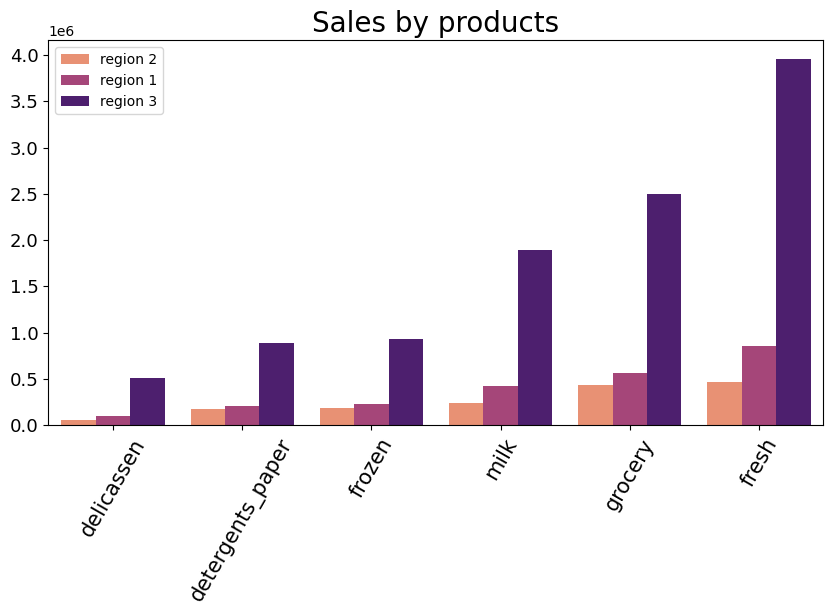

In [18]:
# create the chart by giving it a size, a title
fig, ax = plt.subplots(figsize = (10, 5))
ax.set_title( "Sales by products" , size = 20)

# chosing the chart type, the color theme, the data, selecting the variables for the x and y axis, 
# and adding the region variable as a color
sns.barplot(x=w_prod, y=w_sales, hue=w_region,
            data = w_unpivot,
            palette = "magma_r")

# rotation the data info to avoid overlapping
plt.xticks(rotation = 60)
# plt.style.use('seaborn')

# resize the text
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 13)



### By regions

In [16]:
products_region = region_total['region'].to_numpy()
sales_region = region_total['sales'].to_numpy()

<AxesSubplot:title={'center':'Sales by regions'}>

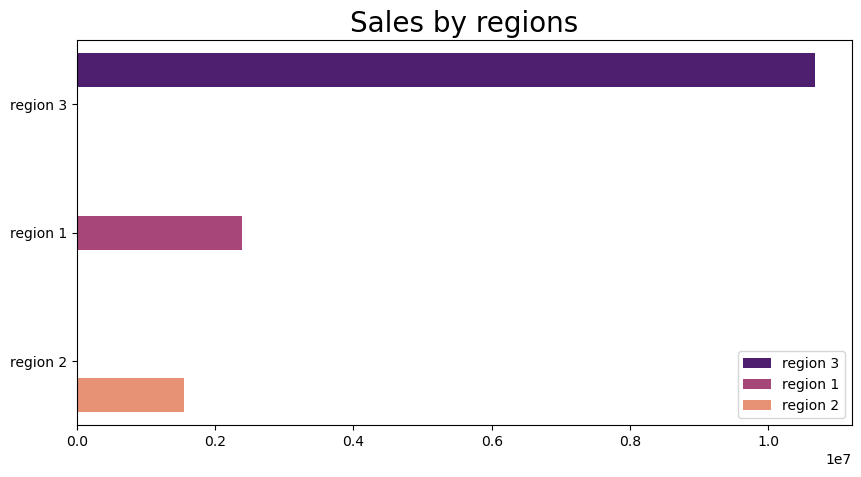

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title( "Sales by regions" , size = 20)
barWidth = 1
sns.barplot(y=products_region, 
            x=sales_region, 
            hue=products_region,
            data = region_total,
            palette = "magma",
            orient='h')